Load the modules that we will need

In [7]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.stats.moments import rolling_mean
from pandas.stats.moments import rolling_window
from IPython.display import display

%matplotlib inline

Load the sunspots data set

In [8]:
df=sm.datasets.sunspots.load_pandas().data
print type(df)
df.head()

<class 'pandas.core.frame.DataFrame'>


,YEAR,SUNACTIVITY
0,1700,5
1,1701,11
2,1702,16
3,1703,23
4,1704,36


Plot the data, plus a rolling average of the data

<class 'pandas.core.frame.DataFrame'>


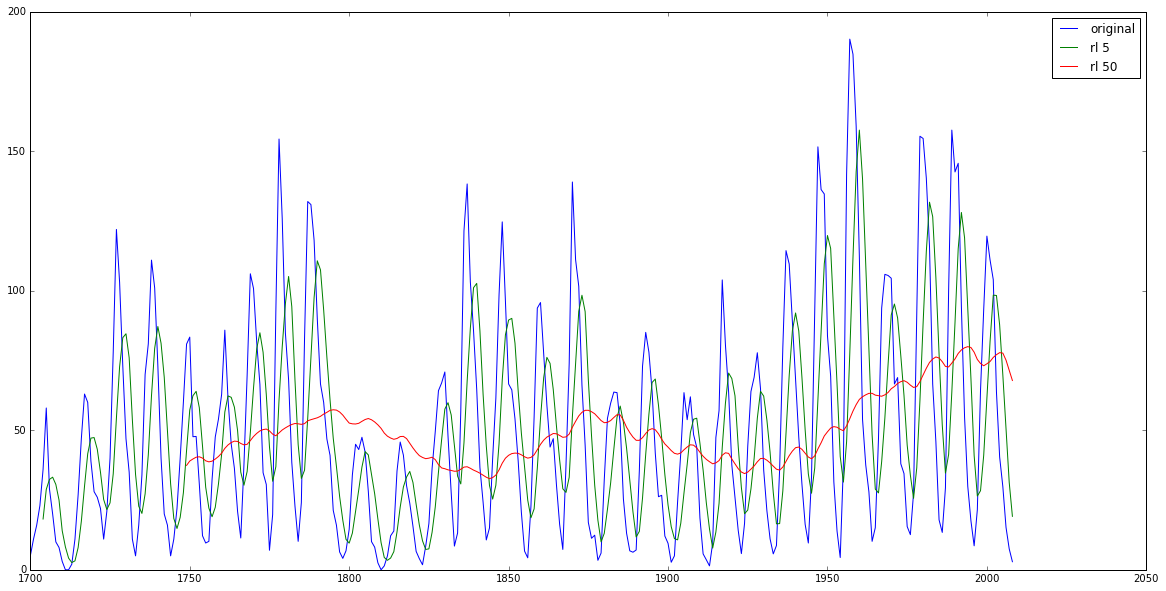

In [9]:
# plot sun-activity vs year
plt.figure(figsize=(20,10))
plt.plot(df.YEAR, df.SUNACTIVITY, label="original")

mean1=rolling_mean(df,5)
mean2=rolling_mean(df,50)

print type(mean1)

plt.plot(df.YEAR, mean1.SUNACTIVITY, label="rl 5")
plt.plot(df.YEAR, mean2.SUNACTIVITY, label="rl 50")
plt.legend()

plt.show()

In [10]:
df=df.tail(150)
df=df.set_index('YEAR', drop=True)
display(df.head())

,SUNACTIVITY
YEAR,
1859,93.8
1860,95.8
1861,77.2
1862,59.1
1863,44.0


In [11]:
def plot_window(win_type):
    df2=rolling_window(df, 22, win_type)
    df2.columns=[win_type]
    df2.plot(ax=ax)

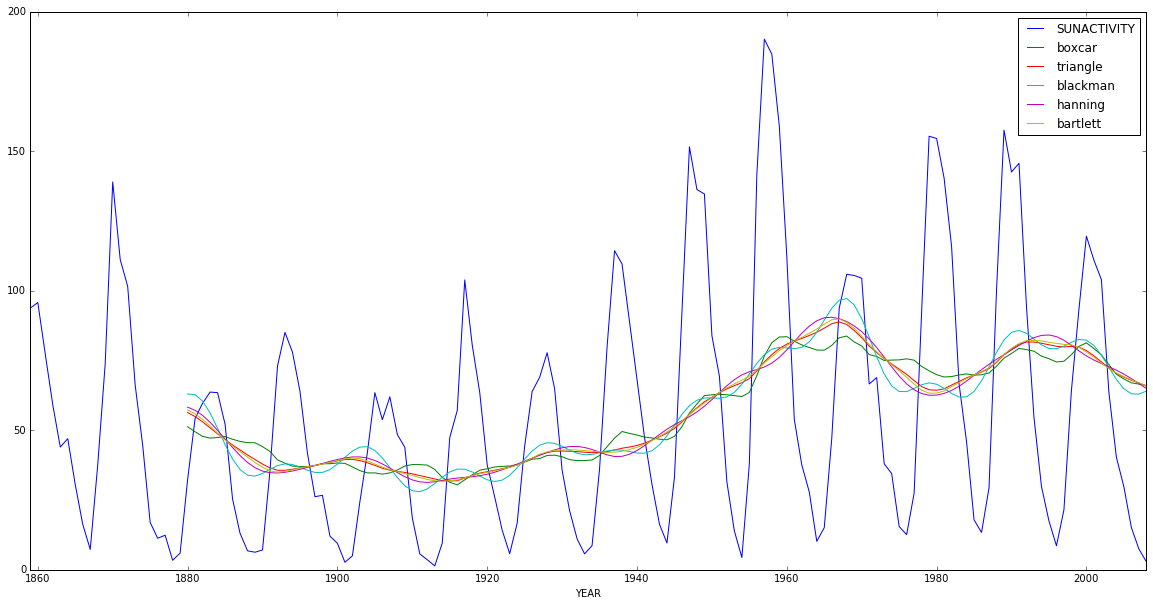

In [12]:
ax=df.plot(figsize=(20,10))
plot_window('boxcar')
plot_window('triangle')
plot_window('blackman')
plot_window('hanning')
plot_window('bartlett')
plt.show()

In [15]:
import numpy as np
# calculate mean of sunspot data
data=df.values
N=len(data)
y=data-np.mean(data)
norm=np.sum(y**2)
print norm

295987.897933


(150L,)


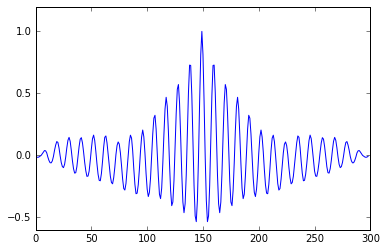

In [16]:
y=y[:,0]
print y.shape
correlated=np.correlate(y,y,mode='full')/norm
plt.plot(correlated)

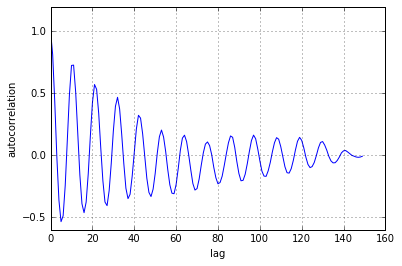

In [17]:
res=correlated[len(correlated)/2:]
plt.plot(res)
plt.grid(True)
plt.xlabel("lag")
plt.ylabel("autocorrelation")
plt.show()

In [21]:
import pandas as pd
help(pd.to_numeric)

Help on function to_numeric in module pandas.tools.util:

to_numeric(arg, errors='raise')
    Convert argument to a numeric type.
    
    Parameters
    ----------
    arg : list, tuple or array of objects, or Series
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an exception
        - If 'coerce', then invalid parsing will be set as NaN
        - If 'ignore', then invalid parsing will return the input
    
    Returns
    -------
    ret : numeric if parsing succeeded.
        Return type depends on input.  Series if Series, otherwise ndarray
    
    Examples
    --------
    Take separate series and convert to numeric, coercing when told to
    
    >>> import pandas as pd
    >>> s = pd.Series(['1.0', '2', -3])
    >>> pd.to_numeric(s)
    >>> s = pd.Series(['apple', '1.0', '2', -3])
    >>> pd.to_numeric(s, errors='ignore')
    >>> pd.to_numeric(s, errors='coerce')



In [22]:
int('$100')

ValueError: invalid literal for int() with base 10: '$100'